#### Análisis Exploratorio de Datos (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

#### **EDA del dataset steam_games**

In [3]:
games = pd.read_parquet("data_clean/1-games.parquet")
games.head()

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


In [4]:
games.info()
games.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        71044 non-null  object 
 1   price         71044 non-null  float64
 2   early_access  71044 non-null  bool   
 3   id            71044 non-null  int64  
 4   release_year  71044 non-null  int64  
 5   publisher     70997 non-null  object 
 6   app_name      71044 non-null  object 
 7   title         71044 non-null  object 
 8   developer     71044 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 4.4+ MB


(71044, 9)

In [5]:
#verificamos cantidad de nulos por columna 
print(games.isna().sum().sort_values(ascending= False)/len(games) * 100)
print(games.shape)

publisher       0.066156
genres          0.000000
price           0.000000
early_access    0.000000
id              0.000000
release_year    0.000000
app_name        0.000000
title           0.000000
developer       0.000000
dtype: float64
(71044, 9)


Vamos a hacer una exploracion sobre distintos atributos del dataset games

**Atributo 'id'**

In [6]:
total_games = len(games['id'].unique())
print(f"Steam posee la cantidad de {total_games} productos únicosen su catálogo")

Steam posee la cantidad de 28842 productos únicosen su catálogo


**Atributo 'genres'**

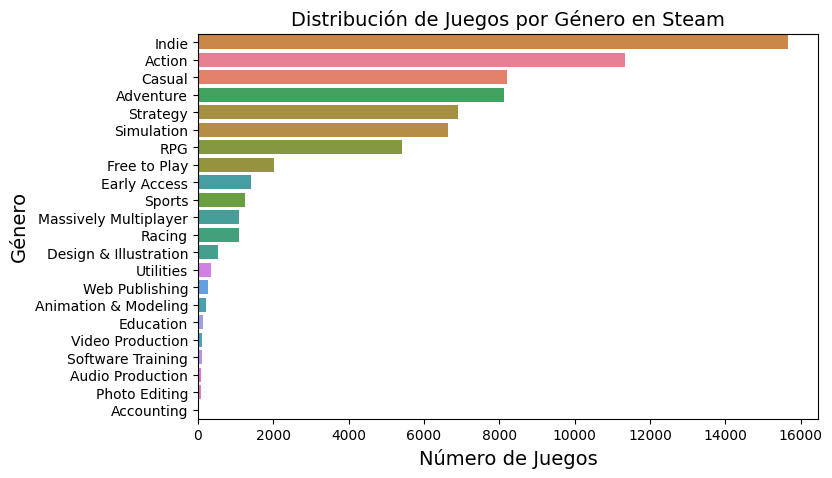

In [7]:
# Distribución de Juegos por Género en Steam
# Visualizamos cuál género tiene más juegos
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=games, y='genres', order=games['genres'].value_counts().index, hue='genres', dodge=False)
ax.set_title('Distribución de Juegos por Género en Steam', fontsize=14)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

plt.show()

* Géneros con mayor cantidad de juegos son: Indie, Casual, Action y Adventure

**Atributo 'release_year'**

In [8]:
#contamos cuantos juegos lanzaron por año 
year_releases = games["release_year"].value_counts()
year_releases

release_year
2017    25018
2016    17738
2015    12335
2014     6361
2013     3038
2012     2127
2011     1001
2010      666
2009      486
2008      337
2018      316
2007      266
2006      222
2005      142
2003      119
2001      112
2004       99
1999       81
1998       78
1997       64
2002       64
2000       59
1996       57
1994       52
1995       49
1993       43
1992       24
1991       22
1990       14
1989       11
2019       10
1988        9
1984        5
1987        5
1986        5
1983        3
2021        3
1985        2
1982        1
Name: count, dtype: int64

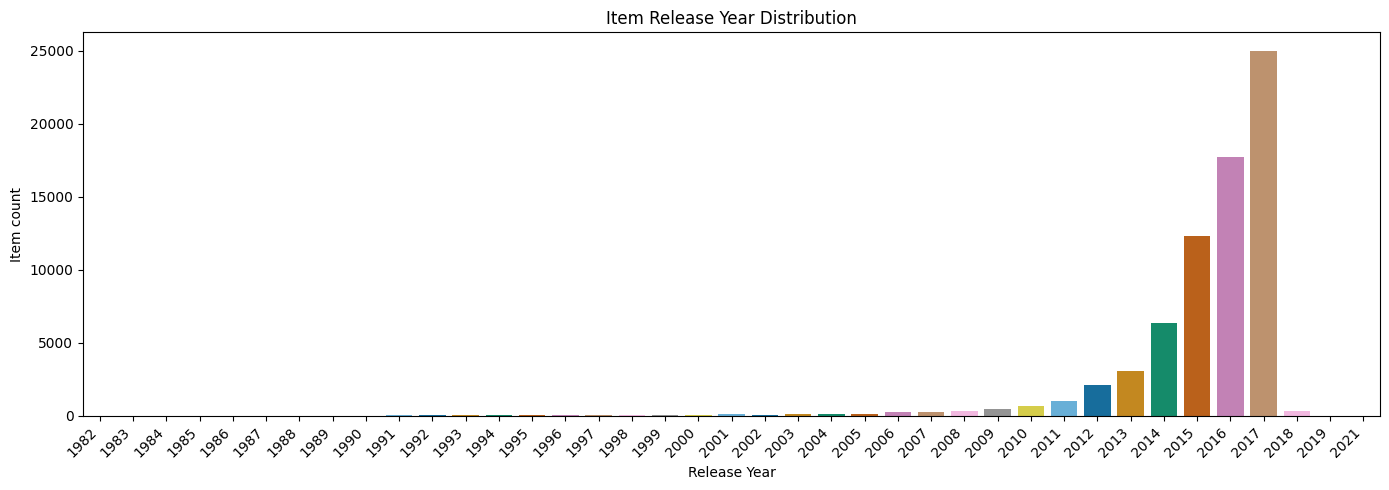

In [9]:
# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=year_releases.index, y=year_releases.values, palette="colorblind")
plt.xlabel('Release Year') ; plt.ylabel('Item count') ; plt.title('Item Release Year Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Se observa que hubo un gran crecimiento en la cantidad de juegos lanzados a lo largo del tiempo con un punto maximo en 2017 de 25018 juegos lanzados 

**Atributos 'developer' y 'publisher'**

In [10]:
# cuenta la cantidad de juegos por publisher. Omite los valores nulos
publisher_count = games[games['publisher'].notnull() & (games['publisher'] != 'Sin dato disponible')]['publisher'].value_counts()

#cuenta la cantidad de juegos por developer 
dev_count = games['developer'].value_counts()

print(publisher_count.head(10))
print(dev_count.head(10))

publisher
KISS ltd                   803
Ubisoft                    683
Degica                     531
Paradox Interactive        435
Big Fish Games             380
SEGA                       371
Dovetail Games - Trains    359
THQ Nordic                 351
ArcaneRaise                323
Aldorlea Games             276
Name: count, dtype: int64
developer
Ubisoft - San Francisco       2516
SmiteWorks USA, LLC           2364
Sin dato disponible            707
DL Softworks                   495
Ronimo Games                   379
Paradox Development Studio     311
Musopia                        285
Arcane Raise                   265
Dovetail Games                 256
Choice of Games                248
Name: count, dtype: int64


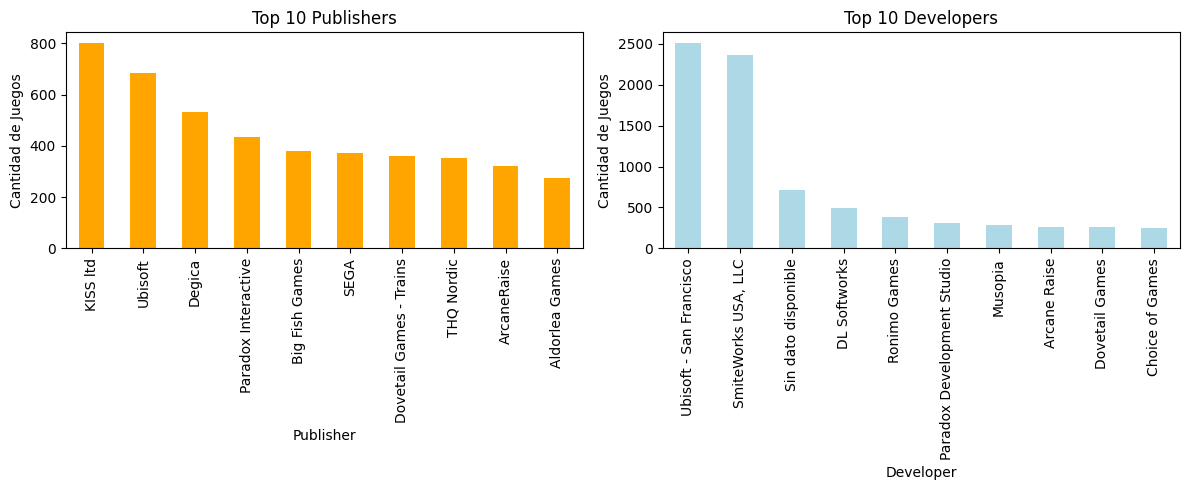

In [11]:
# Crear una figura con dos subplots uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Primer subplot para los publishers
publisher_count[:10].plot(kind='bar', color='orange', ax=axes[0])
axes[0].set_xlabel('Publisher')
axes[0].set_ylabel('Cantidad de Juegos')
axes[0].set_title('Top 10 Publishers')

# Segundo subplot para los developers
dev_count[:10].plot(kind='bar', color='lightblue', ax=axes[1])
axes[1].set_xlabel('Developer')
axes[1].set_ylabel('Cantidad de Juegos')
axes[1].set_title('Top 10 Developers')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

* En el campo de los desarrolladores, Ubisoft y SmiteWorks son que mas juegos han desarrollado, con gran diferencia al resto.
* En el caso de los publichers KISS ltd y Ubisoft son las que mas juegos publicaron pero sin un gran diferencia frente a las demas empresas.

**Atributo 'price'**

In [12]:
# Obtiene los precios para cada juego y hace un dataframe
unique_prices = games.groupby('id')['price'].unique().reset_index().explode('price')
df_unique_prices = unique_prices

In [13]:
df_unique_prices

,id,price
0,10,9.99
1,20,4.99
2,30,4.99
3,40,4.99
4,50,4.99
...,...,...
28837,901805,4.99
28838,2028055,24.99
28839,2028056,14.99
28840,2028103,29.99


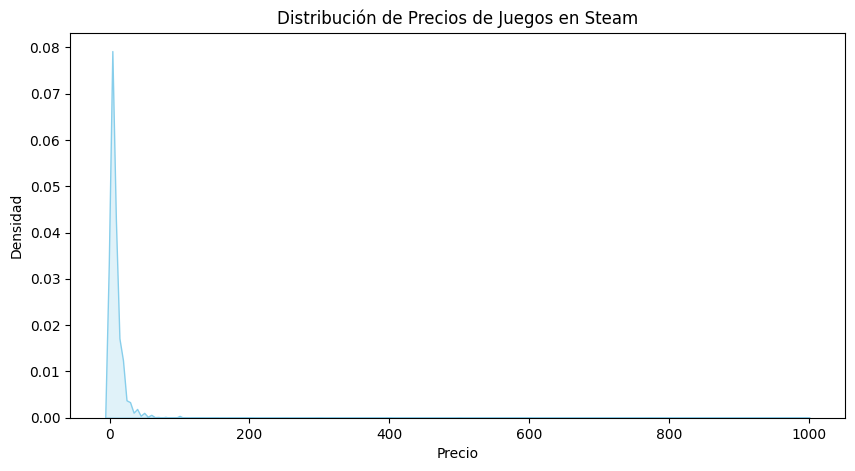

In [14]:
#crea un grafico de densidad con df_precio_unicos
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_unique_prices, x='price', color='skyblue', fill=True)
plt.xlabel('Precio') ; plt.ylabel('Densidad') ; plt.title('Distribución de Precios de Juegos en Steam')
plt.show()

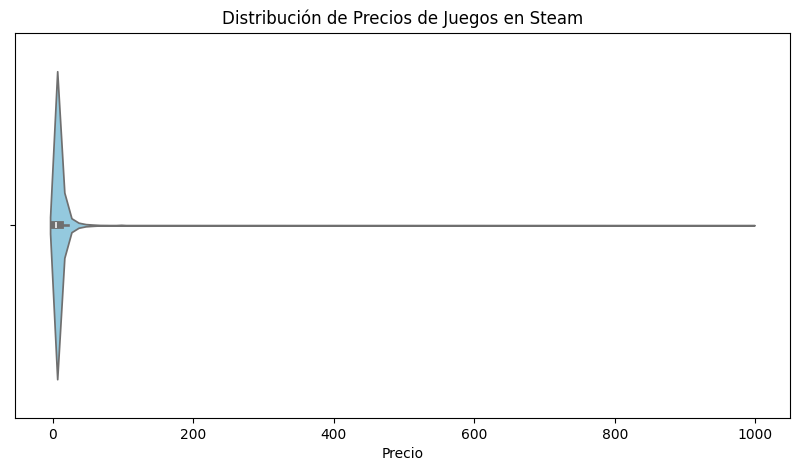

In [15]:
#grafico de violin con df_precio_unicos
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_unique_prices, x='price', color='skyblue')
plt.xlabel('Precio') ; plt.title('Distribución de Precios de Juegos en Steam')
plt.show()


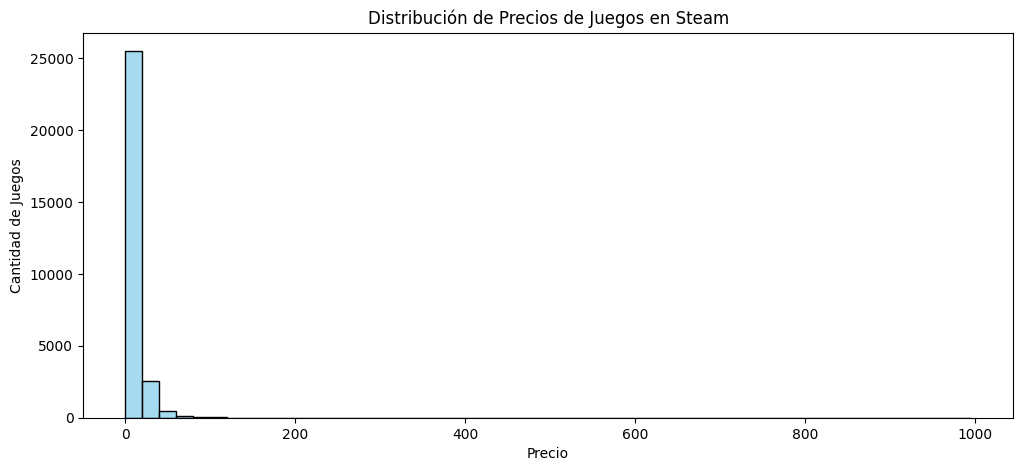

In [16]:
#crea un histograma de los precios de los juegos en steam 
plt.figure(figsize=(12, 5))
sns.histplot(df_unique_prices['price'], bins=50, color='skyblue')
plt.xlabel('Precio') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Distribución de Precios de Juegos en Steam')
plt.show()


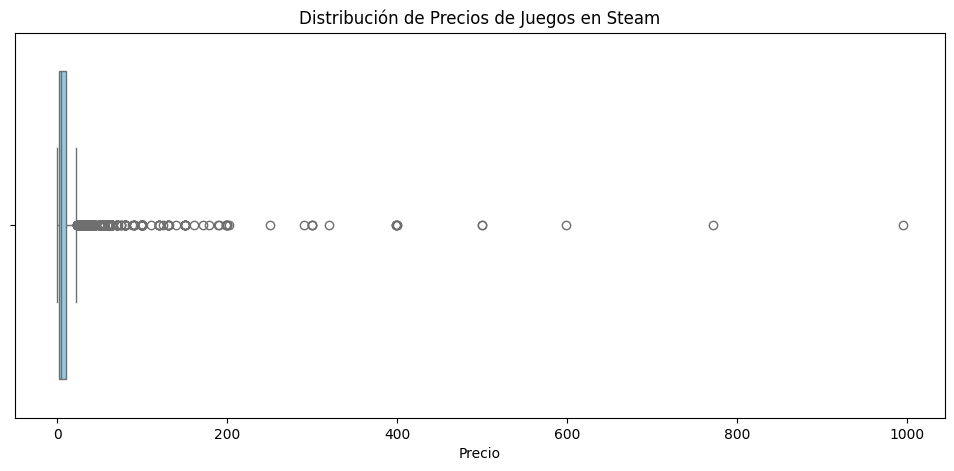

In [17]:
# crea un boxplot de los precios de los juegos en steam 
#ponele nombres a cada eje. El eje X es precio y el eje Y es cantidad de juegos
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_unique_prices['price'], color='skyblue')
plt.xlabel('Precio') ; plt.title('Distribución de Precios de Juegos en Steam')
plt.show()


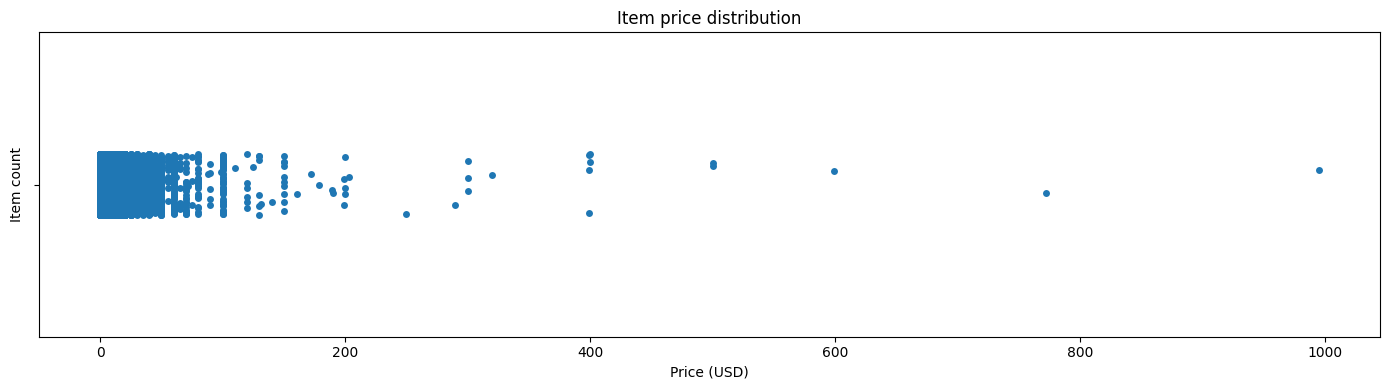

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(14, 4))  # Cambiado para usar solo un subplot

sns.stripplot(data=df_unique_prices, x='price', ax=ax1)  # Especifica la columna 'price' como 'x'
ax1.set_xlabel('Price (USD)') ; ax1.set_ylabel('Item count') ; ax1.set_title('Item price distribution')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [19]:
#sacar la mediana, la media y otros datos estadisticos de los precios de los juegos
print('Mediana:', df_unique_prices['price'].median())
print('Media:', df_unique_prices['price'].mean())
print('Desviación Estándar:', df_unique_prices['price'].std())
print('Mínimo:', df_unique_prices['price'].min())
print('Máximo:', df_unique_prices['price'].max())

Mediana: 4.99
Media: 8.667592399969022
Desviación Estándar: 16.06387082394802
Mínimo: 0.0
Máximo: 995.0


* Vemos que los precios de los juegos se mueven principalmente entre los 0 y 100 USD.

* El precio medio (mediana) de los juegos es de: 4.99 dólares

* El precio promedio (mean) de los juegos es de: 8.67 dólares

* El precio maximo es de 995 dolares

In [20]:
#obtengo cuantos juegos son gratis
free_items = games[games['price'] == 0]
free_items

,genres,price,early_access,id,release_year,publisher,app_name,title,developer
5,Free to Play,0.0,False,643980,2018,"Making Fun, Inc.",Ironbound,Ironbound,Secret Level SRL
6,Indie,0.0,False,643980,2018,"Making Fun, Inc.",Ironbound,Ironbound,Secret Level SRL
7,RPG,0.0,False,643980,2018,"Making Fun, Inc.",Ironbound,Ironbound,Secret Level SRL
8,Strategy,0.0,False,643980,2018,"Making Fun, Inc.",Ironbound,Ironbound,Secret Level SRL
9,Casual,0.0,False,670290,2017,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,Poolians.com
...,...,...,...,...,...,...,...,...,...
71019,Action,0.0,False,771810,2018,Retro Army Limited,The spy who shot me™,The spy who shot me™,Retro Army Limited
71020,Adventure,0.0,False,771810,2018,Retro Army Limited,The spy who shot me™,The spy who shot me™,Retro Army Limited
71021,Indie,0.0,False,771810,2018,Retro Army Limited,The spy who shot me™,The spy who shot me™,Retro Army Limited
71026,Casual,0.0,False,769330,2018,Riviysky,BAE 2,BAE 2,Riviysky


* Hay 7205 juego gratis (de 28842 que hay en la plataforma). Es decir Steam brinda un 25% de juegos gratis. 

### **EDA del dataset reviews**

In [21]:
reviews = pd.read_parquet("data_clean/2-reviews.parquet") # Lectura del dataset
reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2011,2,2013
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013


In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48690 non-null  object
 1   user_url            48690 non-null  object
 2   reviews_item_id     48690 non-null  int64 
 3   reviews_helpful     48690 non-null  object
 4   reviews_recommend   48690 non-null  bool  
 5   posted_year         48690 non-null  int64 
 6   sentiment_analysis  48690 non-null  int64 
 7   release_year        48690 non-null  int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 2.6+ MB


In [23]:
#verificamos cantidad de nulos por columna
reviews.isnull().sum()

user_id               0
user_url              0
reviews_item_id       0
reviews_helpful       0
reviews_recommend     0
posted_year           0
sentiment_analysis    0
release_year          0
dtype: int64

Analizamos los distintos atributos 

**Atributo 'user_id'**

In [24]:
#contamos cuantos usuarios unicos hay en el dataset
total_users = len(reviews["user_id"].unique())
print(f"Steam posee la cantidad de {total_users} usuarios únicos en su plataforma")

Steam posee la cantidad de 22936 usuarios únicos en su plataforma


In [25]:
# realizamos el conteo de cuanta gente SI recomienda y cuanta NO recomienda los juegos
sentiment_class= reviews["reviews_recommend"].value_counts()
sentiment_class

reviews_recommend
True     43537
False     5153
Name: count, dtype: int64

* Un 12% (5153) de los usuarios no recomiendan el juego que consumen. El 88% recomienda o es neutral

**Atributo 'sentiment_analysis'**

In [26]:
# contamos cuantas reviews positivas, netrales y negativas hay en el dataset.
sentiment_class= reviews["sentiment_analysis"].value_counts()
sentiment_class

sentiment_analysis
1    29886
2    14629
0     4175
Name: count, dtype: int64

In [27]:
# contamos cuantas reviews positivas, netrales y negativas hay en el dataset.
sentiment_class= reviews["sentiment_analysis"].value_counts()
porcentaje = sentiment_class / sentiment_class.sum() * 100
porcentaje

sentiment_analysis
1    61.380160
2    30.045184
0     8.574656
Name: count, dtype: float64


* Reviews con sentimiento neutral = 61%

* Reviews con sentimiento positivo = 30%

* Reviews con sentimiento negativo = 9%

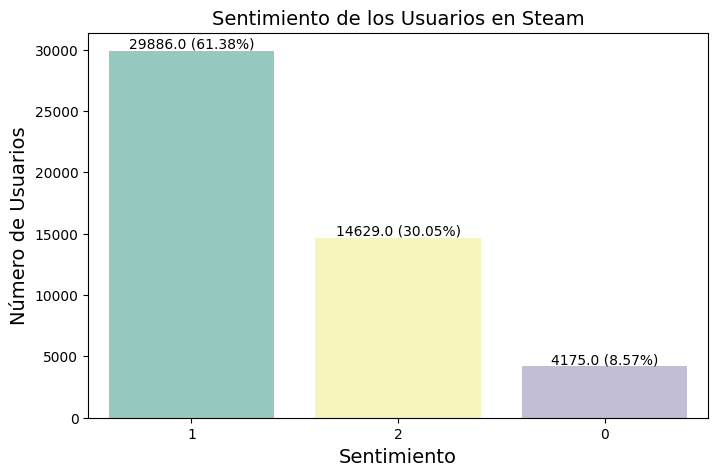

In [28]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=reviews, x='sentiment_analysis', order=reviews['sentiment_analysis'].value_counts().index, palette='Set3')
ax.set_title('Sentimiento de los Usuarios en Steam', fontsize=14)
ax.set_xlabel('Sentimiento', fontsize=14)
ax.set_ylabel('Número de Usuarios', fontsize=14)

total = len(reviews)  # Obtener el total de usuarios

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total*100:.2f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

**Atributo 'posted_year'**

In [29]:
reviews.shape

(48690, 8)

In [30]:
posted_date =reviews["posted_year"].describe()
posted_date

count    48690.000000
mean      2013.927973
std          1.105259
min       2010.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted_year, dtype: float64

* La media de posted year es 2013

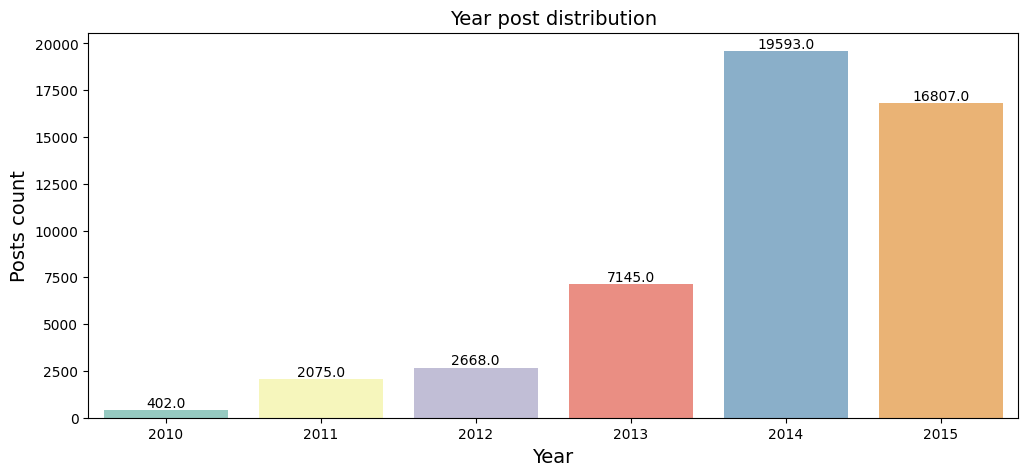

In [31]:
#Grafico de barras que muestra la cantidad de posteos por año desde 2010 a 2015 
#el eje X es el año y el eje Y es la cantidad de posteos 
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=reviews, x='posted_year', palette='Set3')
ax.set_title('Year post distribution', fontsize=14)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Posts count', fontsize=14)

# Agrego el número de posteos encima de cada columna
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

* La cantidad total de posteos en la plataforma hasta el año informado es de 48690.
* El año con más posts fue 2014 con 19593

### EDA del df items

In [32]:
items = pd.read_parquet("data_clean/3-items.parquet")
items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id
0,10,Counter-Strike,0.10,76561197970982479,277,76561197970982479
1,30,Day of Defeat,0.12,76561197970982479,277,76561197970982479
2,300,Day of Defeat: Source,78.88,76561197970982479,277,76561197970982479
3,240,Counter-Strike: Source,30.88,76561197970982479,277,76561197970982479
4,3830,Psychonauts,5.55,76561197970982479,277,76561197970982479


In [137]:
items.info()
items.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246362 entries, 0 to 3246361
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   item_id           int64  
 1   item_name         object 
 2   playtime_forever  float64
 3   steam_id          int64  
 4   items_count       int64  
 5   user_id           object 
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


(3246362, 6)

In [138]:
items.isnull().sum() # Existencia de nulos

item_id             0
item_name           0
playtime_forever    0
steam_id            0
items_count         0
user_id             0
dtype: int64

**Atributo 'items_count': cantidad de items que consume un usuario**


In [34]:
# obtenemos la cantidad de juegos que tiene cada usuario
items_count = items.groupby('user_id')['items_count'].unique().explode()  
items_count= pd.DataFrame(items_count) #convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user.head()

#obtengo un df que tiene la cantidad de juegos que tiene cada usuario

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027


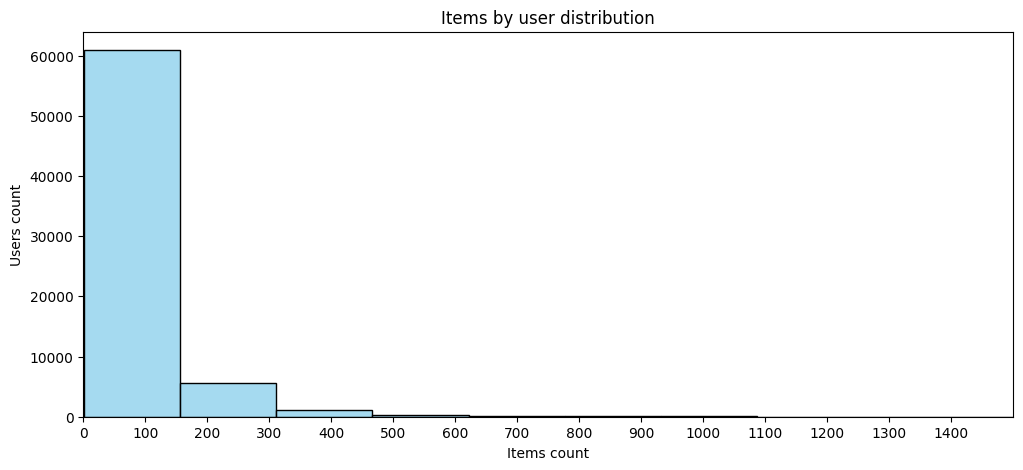

In [42]:
#histograma de la cantidad de items conumida por usuario
plt.figure(figsize=(12, 5))
sns.histplot(items_count_user['items_count'], bins=50, color='skyblue')
plt.xlim(0, 1500)
plt.xticks(range(0, 1500, 100))
plt.xlabel('Items count') ; plt.ylabel('Users count') ; plt.title('Items by user distribution')
plt.show()


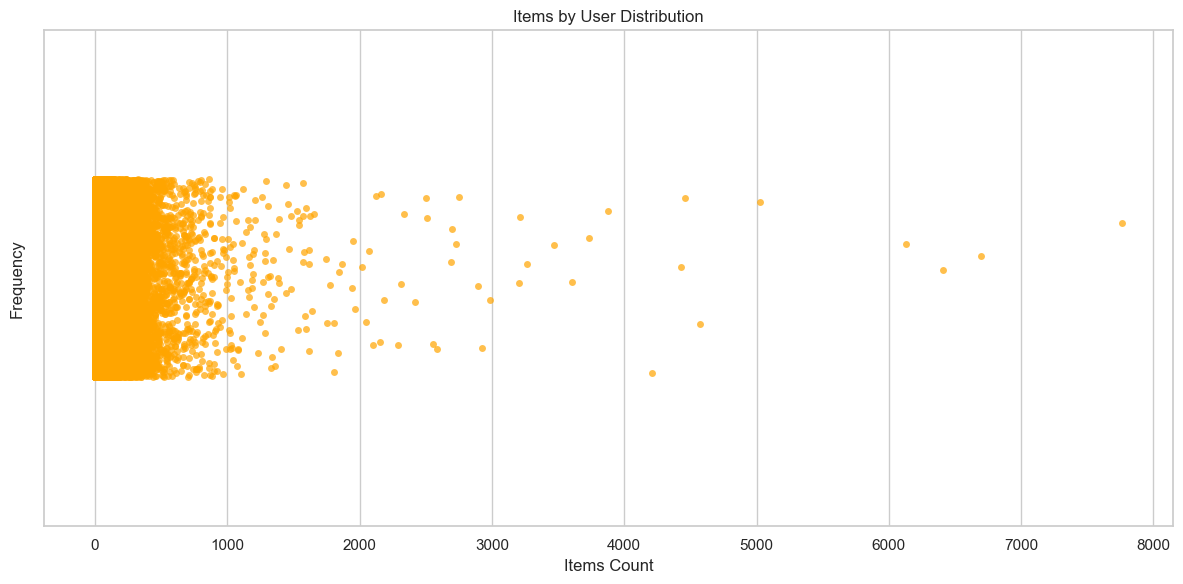

In [141]:
# Creamos un un Stripplot para visualizar la distribución de la cantidad de items por usuario
sns.set_theme(style="whitegrid", palette="pastel")

fig, ax = plt.subplots(figsize=(12, 6))

# Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=ax, color="orange", jitter=0.2, alpha=0.7)
ax.set_xlabel('Items Count')
ax.set_ylabel('Frequency')
ax.set_title('Items by User Distribution')

plt.tight_layout()
plt.show()

In [49]:
items_count_user['items_count'].astype(float).describe()

count    68403.000000
mean        74.407161
std        134.075659
min          1.000000
25%         16.000000
50%         42.000000
75%         90.000000
max       7762.000000
Name: items_count, dtype: float64

* La media de juegos consumidos es 74 
* La cantidad total artículos items consumidos es de 68403.
* El user_id con más cantidad de artículos consumidos es phrostb con 7762

**Atributo playtime_forever: tiempo en horas acumulados que un usuario ha jugado.**

In [143]:
#Top 5 de usuarios con mayor número de horas de juego
time_played = items.groupby('user_id')['playtime_forever'].unique().explode()  # Obtenemos el tiempo de juego por usuari
time_played = pd.DataFrame(time_played)  # Convertimos a DataFrame
time_played['playtime_forever'] = time_played['playtime_forever'] # Convertimos a entero
user_time_played = time_played.sort_values('playtime_forever', ascending=False)  # Ordenamos de mayor a menor
user_time_played.head(5)


,playtime_forever
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13


In [145]:
user_time_played

,playtime_forever
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


In [146]:
#obtengo la media de tiempo jugado por usuario
user_time_played_media = user_time_played['playtime_forever'].mean()
user_time_played_media

29.583710474921627

In [148]:
#obtengo el usuario que mas horas jugo
user_time_played_max = user_time_played['playtime_forever'].max()
user_time_played_max

10712.88

* El user_id con más cantidad de tiempo consumido en juegos Steam es wolop con 10712 horas
* El tiempo promedio (mean) de juego por usuario es de: 29.5 horas


### Creamos el dataframe que servira para la consulta del sistema de recomendacion
El objetivo es obtener un dataframe reducido para poder hacer el analisis para el sistema de recomendacion, con la aplicacion de *similitud del coseno*, de forma mas optimizada

In [38]:
reviews = pd.read_parquet("data_clean/2-reviews.parquet")
items = pd.read_parquet('data_clean/3-items.parquet')

In [39]:
reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2011,2,2013
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013


In [40]:
# Vemos que hay reviews_recomend=FALSE y sentiment_analysis=2, no hace sentido.
# Vamos a crear un ranking ambas columnas: sentiment_analysis y reviews_recommend.
# Combinar ambas variables para generar una nueva columna rating 
filtered_reviews = reviews[(reviews['reviews_recommend'] == False) & (reviews['sentiment_analysis'] == 2)][['reviews_recommend', 'sentiment_analysis']]
print(filtered_reviews)

       reviews_recommend  sentiment_analysis
94                 False                   2
264                False                   2
494                False                   2
738                False                   2
794                False                   2
...                  ...                 ...
47985              False                   2
48081              False                   2
48314              False                   2
48348              False                   2
48541              False                   2

[448 rows x 2 columns]


Se considera la siguiente escala en función de la combinación de las dos variables de esta manera:
* sentiment_analysis = 0 & recommend = True or False --> ranking = 1 
* sentiment_analysis = 1 & recommend = False         --> ranking = 2 
* sentiment_analysis = 1 & recommend = True          --> ranking = 3 
* sentiment_analysis = 2 & recommend = False         --> ranking = 4 
* sentiment_analysis = 2 & recommend = True          --> ranking = 5 

In [41]:
# Se crea una funcion que calcula una calificación basada en el análisis de sentimientos 
# y la recomendación de review de juegos realizado por los usuarios.
def calculate_ranking(row):
    sentiment = row['sentiment_analysis']
    recommend = row['reviews_recommend']
    
    if sentiment == 0 and recommend or not recommend:
        return 1
    elif sentiment == 1 and not recommend:
        return 2
    elif sentiment == 1 and recommend:
        return 3
    elif sentiment == 2 and not recommend:
        return 4
    elif sentiment == 2 and recommend:
        return 5

reviews['rating'] = reviews.apply(calculate_ranking, axis=1)

In [42]:
reviews

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,posted_year,sentiment_analysis,release_year,rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250,No ratings yet,True,2011,1,2009,3
1,evcentric,http://steamcommunity.com/id/evcentric,248820,No ratings yet,True,2011,2,2013,5
2,doctr,http://steamcommunity.com/id/doctr,250320,2 of 2 people (100%) found this review helpful,True,2013,2,2013,5
3,maplemage,http://steamcommunity.com/id/maplemage,211420,35 of 43 people (81%) found this review helpful,True,2014,1,2012,3
4,Wackky,http://steamcommunity.com/id/Wackky,249130,7 of 8 people (88%) found this review helpful,True,2014,0,2013,1
...,...,...,...,...,...,...,...,...,...
48685,kushikushigani,http://steamcommunity.com/id/kushikushigani,332310,No ratings yet,True,2015,1,2017,3
48686,How51,http://steamcommunity.com/id/How51,440,No ratings yet,True,2014,1,2007,3
48687,76561198111410893,http://steamcommunity.com/profiles/76561198111...,304930,No ratings yet,True,2014,1,2017,3
48688,zaza147,http://steamcommunity.com/id/zaza147,265630,No ratings yet,True,2015,2,2014,5


Se aplica esta función en una nueva columna sobre el dataframe df_reviews

In [43]:
#mostrar de la columna 'rating' los valores unicos
reviews['rating'].unique()

array([3, 5, 1], dtype=int64)

In [44]:
reviews.shape  

(48690, 9)

In [45]:
#Creo un nuevo df1. Me quedo con las columnas user_id, reviews_item_id y rating
df1 = reviews[['user_id', 'reviews_item_id', 'rating']]
df1.head()

,user_id,reviews_item_id,rating
0,76561197970982479,1250,3
1,evcentric,248820,5
2,doctr,250320,5
3,maplemage,211420,3
4,Wackky,249130,1


##### Se crea otro dataframe que contenga unicamente los 'item_id' y los nombres de los juego.

In [46]:
#creo un df2 con las columnas item_id y item_name
df2 = items[['item_id', 'item_name']]
# Se borran los duplicados
df2 = df2.drop_duplicates()

print(df2.shape) # Tamaño
df2.head()

(10050, 2)


,item_id,item_name
0,10,Counter-Strike
1,30,Day of Defeat
2,300,Day of Defeat: Source
3,240,Counter-Strike: Source
4,3830,Psychonauts


In [47]:
#uno los dos dataframes por la columna reviews_item_id y item_id
df_joined = df1.merge(df2, left_on="reviews_item_id", right_on="item_id", how='left')
df_joined

,user_id,reviews_item_id,rating,item_id,item_name
0,76561197970982479,1250,3,1250.0,Killing Floor
1,evcentric,248820,5,248820.0,Risk of Rain
2,doctr,250320,5,250320.0,The Wolf Among Us
3,maplemage,211420,3,211420.0,Dark Souls: Prepare to Die Edition
4,Wackky,249130,1,249130.0,LEGO® MARVEL Super Heroes
...,...,...,...,...,...
48685,kushikushigani,332310,3,332310.0,LEGO® Worlds
48686,How51,440,3,NaN,NaN
48687,76561198111410893,304930,3,304930.0,Unturned
48688,zaza147,265630,5,265630.0,Fistful of Frags


In [48]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48690 entries, 0 to 48689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          48690 non-null  object 
 1   reviews_item_id  48690 non-null  int64  
 2   rating           48690 non-null  int64  
 3   item_id          44092 non-null  float64
 4   item_name        44092 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ MB


In [49]:
# se revisan los reviews sin nombres de juegos
# Selecciona las filas con valores nulos. 
# .any(axis=1) es para que busque en las filas
nan_item = df_joined[df_joined.isnull().any(axis=1)] 
nan_item

,user_id,reviews_item_id,rating,item_id,item_name
8,76561198077246154,440,3,NaN,NaN
16,devvonst,440,5,NaN,NaN
29,boydeer,440,3,NaN,NaN
34,jarrodtrim,440,5,NaN,NaN
36,76561198067936203,440,3,NaN,NaN
...,...,...,...,...,...
48651,JacTehSharp,440,3,NaN,NaN
48653,ViniReaper,440,5,NaN,NaN
48673,BlinkV1,440,3,NaN,NaN
48678,76561198095035915,440,1,NaN,NaN


In [50]:
# Se calculan la cantidad de juegos en esta situación
# Se usa la función 'unique()' para obtener los valores únicos
print(len(nan_item['reviews_item_id'].unique()))
nan_item.head()

257


,user_id,reviews_item_id,rating,item_id,item_name
8,76561198077246154,440,3,NaN,NaN
16,devvonst,440,5,NaN,NaN
29,boydeer,440,3,NaN,NaN
34,jarrodtrim,440,5,NaN,NaN
36,76561198067936203,440,3,NaN,NaN


* Hay 257 juegos que no tienen item_id pero sí tienen reviews. No me sirven dado que el sistema de recomendacion estara basado en estos atributos, necesito a ambos.

In [51]:
# Se borran los nulos
df_joined = df_joined.dropna(subset=['item_id'])
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44092 entries, 0 to 48689
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          44092 non-null  object 
 1   reviews_item_id  44092 non-null  int64  
 2   rating           44092 non-null  int64  
 3   item_id          44092 non-null  float64
 4   item_name        44092 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [52]:
df_joined.shape # Tamaño

(44092, 5)

Se obtiene el dataset df_4_model que contiene la informacion que necesito para realizar el modelo de recomendacion.

In [53]:
df_4_model = df_joined[['user_id', 'item_name', 'rating','item_id' ]]
df_4_model.head(5)

,user_id,item_name,rating,item_id
0,76561197970982479,Killing Floor,3,1250.0
1,evcentric,Risk of Rain,5,248820.0
2,doctr,The Wolf Among Us,5,250320.0
3,maplemage,Dark Souls: Prepare to Die Edition,3,211420.0
4,Wackky,LEGO® MARVEL Super Heroes,1,249130.0


In [54]:
#tipo de dato item_id
df_4_model['item_id'].dtype


dtype('float64')

In [55]:
#pasar item_id a int64
df_4_model['item_id'] = df_4_model['item_id'].astype('int64')
df_4_model['item_id'].dtype 

dtype('int64')

In [56]:
# Agrupa las calificaciones por rating
ratings_count = df_4_model['rating'].value_counts().reset_index()
ratings_count.columns = ['rating', 'count']
# Agrupa los juegos únicos por rating
unique_games_per_rating = df_4_model.groupby('rating')['item_name'].nunique().reset_index()

In [57]:
unique_games_per_rating

,rating,item_name
0,1,1472
1,3,2107
2,5,1543


* Entre el rating 3 y 5 se encuentra el 70% de los juegos. Lo que indica que mas de la mitad de los juegos son recomendados por los usarios. 

In [58]:
df_4_model.to_csv('data_clean/10-df4_model.csv', index=False, encoding='utf-8')

In [59]:
modelo_recomend = pd.read_csv("data_clean/10-df4_model.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_recomend) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"data_clean/10-df4_model.parquet") # exportamos la tabla a parquet